In [346]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import pandas as pd
import matplotlib.cm
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

import matplotlib.lines as mlines
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import time
import json
import random
import datetime as dt

print("modules imported")

randomSeed = 1984

pathWeather = "/users/sajudson/Dropbox/WPI/DS504/project/citibike/weather/"
pathData = "/users/sajudson/Dropbox/WPI/DS504/project/citibike/data/"
pathFigure = "/users/sajudson/Dropbox/WPI/DS504/project/citibike/figures/"

#load expriment dictionary
with open(pathFigure+"experiments.json","r") as f:
    experiments = json.load(f)

file_type = "csv"
figsaveformat = ".png"
excelfilename = 'ds504experiments.xls'
plt.style.use('ggplot')

modules imported


In [347]:
df_experiments = pd.DataFrame.from_dict(experiments)


In [348]:
df1 = df_experiments.T
df1.to_excel(pathFigure+excelfilename) 

df1.index = df1.index.astype('int')
df1.index
df1.tail()

Int64Index([   51,    54,    57,    61,    63,    65,    67,    69,    71,
               72,
            ...
            46309, 46326, 46339, 46355, 46368, 46384, 46401, 46415, 46433,
            46453],
           dtype='int64', length=935)

,featureInputCols,linkFunctionLabel,normalize,rSquared,regressionMethodName,rmse,station,stationAvg,stationCount,stationNonZeroCount,stationStd,stationSum,trainSplitMethod,varianceExplained,version
46384,"[temp, humidity, year, month, hourOfDay, weekd...",none,False,0.328927,glr,0.466696,3658,[[2.067870036101083]],[],[[1385]],[[1.4237846084531993]],[[2864]],random,0.328927,"Added OneHotEncode for hOD, dOW"
46401,"[temp, humidity, year, month, hourOfDay, weekd...",none,False,0.108252,glr,0.165823,3666,[[1.3564954682779455]],[],[[331]],[[0.6994463385371738]],[[449]],random,0.108252,"Added OneHotEncode for hOD, dOW"
46415,"[temp, humidity, year, month, hourOfDay, weekd...",none,False,0.152913,glr,0.225036,3671,[[1.490835030549898]],[],[[491]],[[0.818210204141859]],[[732]],random,0.152913,"Added OneHotEncode for hOD, dOW"
46433,"[temp, humidity, year, month, hourOfDay, weekd...",none,False,0.0572115,glr,0.112668,3675,[[1.2424242424242424]],[],[[231]],[[0.5281030433044008]],[[287]],random,0.0572115,"Added OneHotEncode for hOD, dOW"
46453,"[temp, humidity, year, month, hourOfDay, weekd...",none,False,0.471284,glr,0.482203,3680,[[2.608058608058608]],[],[[1092]],[[1.8222900207272221]],[[2848]],random,0.471284,"Added OneHotEncode for hOD, dOW"


In [349]:
rf1 = {'min':29859, 'max':34273} #Normalized
rf0 = {'min':35109, 'max':38087} #unnormalized
gbt0 = {'min':38674, 'max':42487} #unmormalized
glr0 = {'min':42488, 'max':99999} #unmormalized
df3 = df1.loc[(df1.index >(rf0['min']-1)) & (df1.index < (rf0['max']+1))]


#extract statistics from experiments log file
df3['Average'] = df3['stationAvg'].apply(lambda x:x[0]).apply(lambda x:x[0])
df3['NonZeroCount'] = df3['stationNonZeroCount'].apply(lambda x:x[0]).apply(lambda x:x[0])
df3['StdDev'] = df3['stationStd'].apply(lambda x:x[0]).apply(lambda x:x[0])
df3['Sum'] = df3['stationSum'].apply(lambda x:x[0]).apply(lambda x:x[0])

#create dataframe with station trips statistics
dropColumnList = ['stationAvg','stationStd','stationNonZeroCount','stationSum','stationCount',
                  'featureInputCols','linkFunctionLabel','normalize','rSquared','regressionMethodName',
                  'rmse','varianceExplained','trainSplitMethod','version']

stationStats = df3.drop(dropColumnList,axis=1)
stationStats.index = stationStats.station

stationStats.shape

/anaconda3/envs/ds504spark/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/envs/ds504spark/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/envs/ds504spark/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

(180, 5)

In [350]:
#create DF for each experiment


df_rf0 = df1.loc[(df1.index >(rf0['min']-1)) & (df1.index < (rf0['max']+1))]
df_rf1 = df1.loc[(df1.index >(rf1['min']-1)) & (df1.index < (rf1['max']+1))]
df_gbt0 = df1.loc[(df1.index >(gbt0['min']-1)) & (df1.index < (gbt0['max']+1))]
df_glr0 = df1.loc[(df1.index >(glr0['min']-1)) & (df1.index < (glr0['max']+1))]
df_rf0.shape
df_rf1.shape
df_gbt0.shape
df_glr0.shape

(180, 15)

(180, 15)

(180, 15)

(180, 15)

In [351]:
dropColumnList2 = ['featureInputCols', 'linkFunctionLabel', 'normalize', 'rSquared',
       'regressionMethodName',  'stationAvg', 'stationCount',
       'stationNonZeroCount', 'stationStd', 'stationSum', 'trainSplitMethod', 'version']

def extractMetrics(df,dropList,prefix):
        df_out = df.drop(dropList,axis=1)
        df_out.index = df_out.station
        df_out = df_out.rename(lambda x: prefix +x, axis=1)
        dropColumn = [prefix+'station']
        df_out = df_out.drop(dropColumn,axis=1)
        #df_out.drop([prefix+'station'],axis=1)
        return(df_out)
    
rf0_metrics = extractMetrics(df_rf0,dropColumnList2,'rf0_')
rf1_metrics = extractMetrics(df_rf1,dropColumnList2,'rf1_')
gbt0_metrics = extractMetrics(df_gbt0,dropColumnList2,'gbt0_')

glr0_metrics = extractMetrics(df_glr0,dropColumnList2,'glr0_')


stationMetrics = stationStats.join(rf0_metrics)
stationMetrics = stationMetrics.join(rf1_metrics)
stationMetrics = stationMetrics.join(gbt0_metrics)
stationMetrics = stationMetrics.join(glr0_metrics)
stationMetrics.tail()
stationMetrics.loc[285]
#

,station,Average,NonZeroCount,StdDev,Sum,rf0_rmse,rf0_varianceExplained,rf1_rmse,rf1_varianceExplained,gbt0_rmse,gbt0_varianceExplained,glr0_rmse,glr0_varianceExplained
station,,,,,,,,,,,,,
3658,3658,2.067870,1385,1.423785,2864,0.460033,0.3211,0.539629,0.0793577,0.456805,0.330999,0.466696,0.328927
3666,3666,1.356495,331,0.699446,449,0.164444,-0.0354789,0.169939,-0.0123467,0.157745,0.100552,0.165823,0.108252
3671,3671,1.490835,491,0.818210,732,0.219046,0.1397,0.22236,0.0300923,0.231789,0.126049,0.225036,0.152913
3675,3675,1.242424,231,0.528103,287,0.109042,0.095684,0.128543,-0.00288147,0.119935,0.079724,0.112668,0.0572115
3680,3680,2.608059,1092,1.822290,2848,0.462417,0.498058,0.635729,0.125959,0.44493,0.490814,0.482203,0.471284


station                        285
Average                    3.52601
NonZeroCount                  9112
StdDev                     2.36441
Sum                          32129
rf0_rmse                   1.38657
rf0_varianceExplained     0.578746
rf1_rmse                   1.81851
rf1_varianceExplained     0.276352
gbt0_rmse                  1.39378
gbt0_varianceExplained    0.582341
glr0_rmse                  1.40138
glr0_varianceExplained    0.579092
Name: 285, dtype: object

In [352]:

def scatterPlot(df,xlist,ylist,xlabel,ylabel,filename, legendLocation ="lower right"):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))
    colors = ['red','blue','green']
    markers = ['o','s','v']
    labels = ['random forest', 'gradient boosted trees','general linear regression (poisson)']
    axes.plot(df[xlist[0]],df[ylist[0]], color = colors[0], marker =markers[0], label = labels[0], 
              linewidth = 0,alpha = default_alpha)
    axes.plot(df[xlist[1]],df[ylist[1]], color = colors[1], marker =markers[1], label = labels[1], 
              linewidth = 0,alpha = default_alpha)
    axes.plot(df[xlist[2]],df[ylist[2]], color = colors[2], marker =markers[2], label = labels[2], 
              linewidth = 0,alpha = default_alpha)
    axes.set_ylabel(ylabel)
    #axes[0].set_xlim(np.min(bfStation[xlabel])*1.05-1, np.max(bfStation[xlabel]*1.05))
    #axes[0].set_ylim(0, yScaleMax)
    axes.set_xlabel(xlabel)
    #axes.format_xdata = xtickformat
    #axes.format_ydata = ytickformat
    axes.grid(True)
    #save figure as PNG
    plt.legend(loc=legendLocation, handlelength=1.5, fontsize=12)
    figfilename = pathFigure+filename+xlabel+"_vs_"+ylabel+figsaveformat
    plt.savefig(figfilename, bbox_inches='tight', dpi = (300))
    plt.show()
    
    return



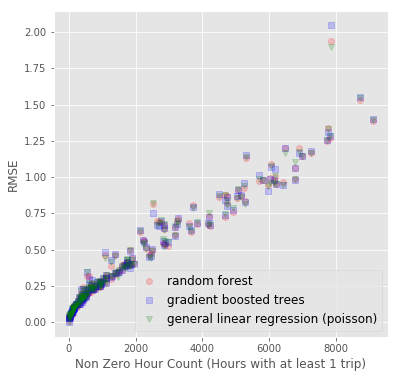

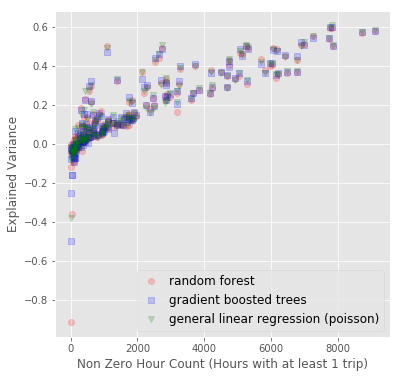

In [353]:
#color_map = {'rf':'red', 'glr':'blue', 'gbt':'green'}
default_alpha = 0.18

#plt.plot(stationMetrics.NonZeroCount, stationMetrics.rf0_rmse, 'ro',linewidth=0,alpha=default_alpha)
#plt.plot(stationMetrics.NonZeroCount, stationMetrics.rf1_rmse, 'bo',linewidth=0,alpha=default_alpha)
#plt.plot(stationMetrics.NonZeroCount, stationMetrics.gbt0_rmse, 'go',linewidth=0,alpha=default_alpha)
filename ="station_model_performance_"
stations = ['index','index','index']
stationsNZC = ['NonZeroCount','NonZeroCount','NonZeroCount']
stationsSum = ['Sum','Sum','Sum']
stationsAvg = ['Average','Average','Average']
expVarList = ['rf0_varianceExplained','glr0_varianceExplained','gbt0_varianceExplained']
rmseList = ['rf0_rmse','glr0_rmse','gbt0_rmse']

RMSELabel = "RMSE"
ExpVarLabel = "Explained Variance"
NZCLabel = "Non Zero Hour Count (Hours with at least 1 trip)"
SumLabel = "Total Number of Trips"
AvgLabel = "Average Number of Trips per hr (Hours with at least 1 trip)"

scatterPlot(stationMetrics,stationsNZC,rmseList,NZCLabel,RMSELabel, filename)
scatterPlot(stationMetrics,stationsNZC,expVarList,NZCLabel,ExpVarLabel, filename)

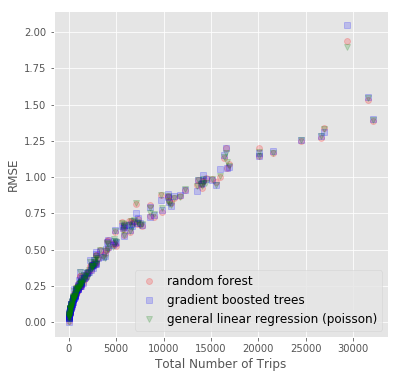

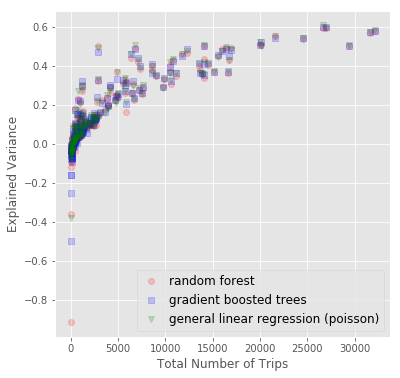

In [354]:
scatterPlot(stationMetrics,stationsSum,rmseList,SumLabel,RMSELabel, filename)  
scatterPlot(stationMetrics,stationsSum,expVarList,SumLabel,ExpVarLabel, filename)

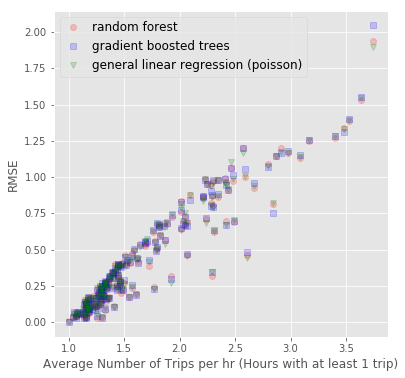

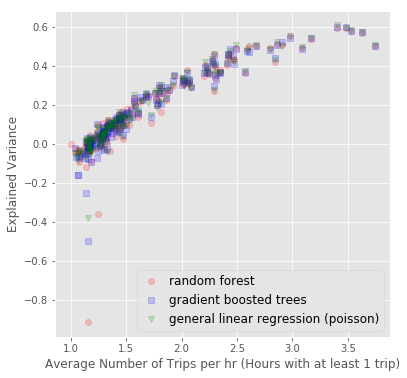

In [355]:
scatterPlot(stationMetrics,stationsAvg,rmseList,AvgLabel,RMSELabel, filename, legendLocation)
scatterPlot(stationMetrics,stationsAvg,expVarList,AvgLabel,ExpVarLabel, filename)

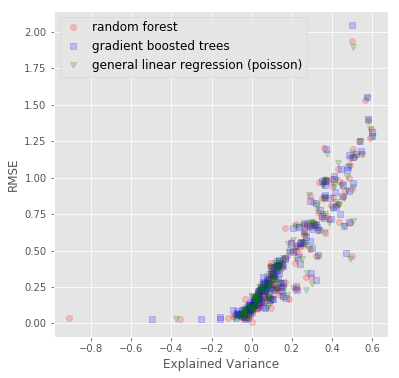

In [356]:
legendLocation = "upper left"
scatterPlot(stationMetrics,expVarList,rmseList,ExpVarLabel,RMSELabel, filename, legendLocation)


(array([38., 58., 22., 14., 11., 14.,  9.,  3.,  4.,  2.,  2.,  3.]),
 array([1.        , 1.22874942, 1.45749883, 1.68624825, 1.91499766,
        2.14374708, 2.37249649, 2.60124591, 2.82999532, 3.05874474,
        3.28749415, 3.51624357, 3.74499298]),
 <a list of 12 Patch objects>)

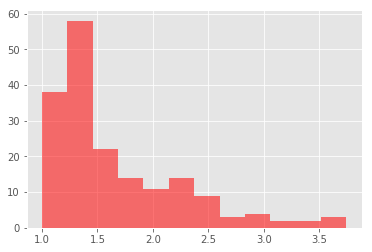

In [357]:
plt.hist(stationMetrics.Average , bins = "doane", label = "Average Trips/Hour",color = "red",linewidth=0,alpha = default_alpha*3)


(array([106.,  23.,  14.,   7.,   7.,   7.,   7.,   0.,   3.,   1.,   2.,
          1.,   2.]),
 array([1.00000000e+00, 2.47238462e+03, 4.94376923e+03, 7.41515385e+03,
        9.88653846e+03, 1.23579231e+04, 1.48293077e+04, 1.73006923e+04,
        1.97720769e+04, 2.22434615e+04, 2.47148462e+04, 2.71862308e+04,
        2.96576154e+04, 3.21290000e+04]),
 <a list of 13 Patch objects>)

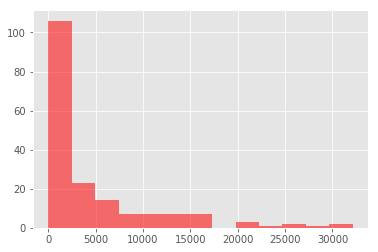

In [358]:
plt.hist(stationMetrics.Sum,  bins = "doane",color = "red",linewidth=0,alpha = default_alpha*3)


(array([79., 26., 17., 14.,  7.,  5., 11.,  5.,  7.,  3.,  4.,  2.]),
 array([1.00000e+00, 7.60250e+02, 1.51950e+03, 2.27875e+03, 3.03800e+03,
        3.79725e+03, 4.55650e+03, 5.31575e+03, 6.07500e+03, 6.83425e+03,
        7.59350e+03, 8.35275e+03, 9.11200e+03]),
 <a list of 12 Patch objects>)

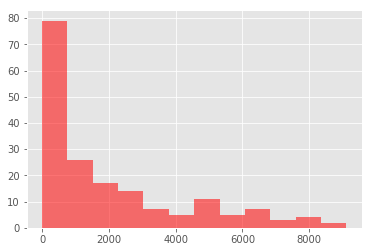

In [359]:
plt.hist(stationMetrics.NonZeroCount, bins = "doane", color = "red",linewidth=0,alpha = default_alpha*3)


In [360]:
df1 = stationMetrics.sort_values(by=['NonZeroCount'], axis=0)
df1["test"] = df1['NonZeroCount']/(2*8760)
stationMetrics.head()

,station,Average,NonZeroCount,StdDev,Sum,rf0_rmse,rf0_varianceExplained,rf1_rmse,rf1_varianceExplained,gbt0_rmse,gbt0_varianceExplained,glr0_rmse,glr0_varianceExplained
station,,,,,,,,,,,,,
72,72,2.206368,5025,1.460661,11087,0.85813,0.348998,0.967519,0.195886,0.852474,0.361999,0.867053,0.36187
116,116,2.233841,3280,1.512312,7327,0.713766,0.384982,0.851193,0.127227,0.686589,0.387926,0.714791,0.395829
119,119,1.168831,154,0.407800,180,0.0893564,-0.0340731,0.0995682,-0.0362434,0.0945405,-0.0362011,0.0905139,-0.0176279
143,143,1.682870,2983,0.981900,5020,0.52373,0.240702,0.586473,0.118939,0.54931,0.258368,0.55519,0.256965
150,150,1.816416,3192,1.287157,5798,0.657356,0.165248,0.703458,0.0594221,0.665321,0.215551,0.653529,0.205407


No handles with labels found to put in legend.


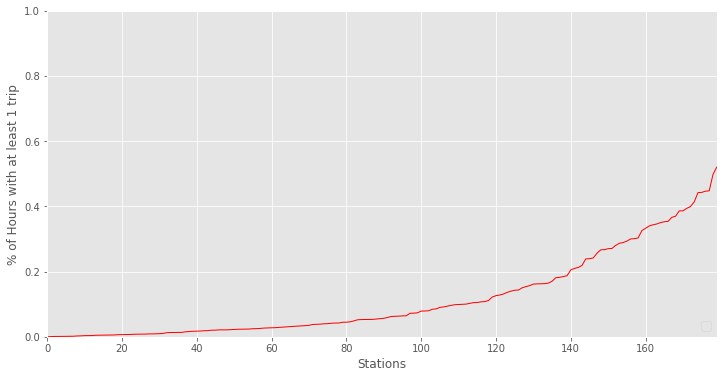

In [365]:
def stationPlot(df,y,xlabel,ylabel, filename, legendLabel = "", legendLocation ="lower right"):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
    colors = ['red','blue','green']
    default_linewidth =1
    alpha_default = 1
    xplot = range(0, len(df.index))
    yScaleMax = 2*8760
    yScaleMax2 = 1
    ytickformat = '%.0f%%'
    df["test"] = df[y]/yScaleMax
    df1 = df.sort_values(by=["test"], axis=0)
    axes.plot(xplot,df1["test"], color = colors[0], linewidth = default_linewidth, 
              label = legendLabel, alpha = alpha_default)
    axes.set_ylabel("% of Hours with at least 1 trip")
    axes.set_ylim(0, yScaleMax2)
    axes.set_xlim(0, 179)
    axes.set_xlabel(xlabel)
    #axes.format_xdata = xtickformat
    axes.format_ydata = ytickformat
    axes.grid(True)
    #save figure as PNG
    plt.legend(loc=legendLocation, handlelength=1.5, fontsize=12)
    figfilename = pathFigure+filename+xlabel+"_vs_"+ylabel+figsaveformat
    plt.savefig(figfilename, bbox_inches='tight', dpi = (300))
    plt.show()
    
    return

stationPlot(stationMetrics,'NonZeroCount','Stations',NZCLabel, "stationNonZeroCount", legendLabel = "", legendLocation ="lower right")

In [362]:
df2 = stationMetrics[stationMetrics['NonZeroCount']== 1]
df2.shape

(1, 14)

In [368]:
77/179

1/24


0.4301675977653631

0.041666666666666664

In [ ]:
stationList =[72, 116, 119, 143, 150, 152, 153, 161, 168, 195, 238, 244, 245,
              252, 255, 259, 260, 275, 278, 279, 280, 285, 289, 307, 312, 319, 
              322, 324, 344, 346, 347, 348, 349, 351, 365, 369, 373, 395, 409, 
              416, 445, 454, 457, 460, 461, 467, 468, 472, 488, 490, 500, 526, 
              530, 534, 536, 537, 2002, 2003, 2004, 2012, 2017, 3002, 3041, 3049, 
              3052, 3061, 3073, 3075, 3076, 3077, 3078, 3098, 3102, 3105, 3107, 
              3113, 3120, 3121, 3123, 3124, 3135, 3140, 3148, 3150, 3158, 3165, 
              3166, 3175, 3219, 3224, 3241, 3246, 3249, 3255, 3283, 3296, 3306, 
              3308, 3311, 3312, 3315, 3318, 3322, 3330, 3333, 3338, 3341, 3342, 
              3344, 3346, 3347, 3348, 3353, 3354, 3357, 3359, 3368, 3369, 3373, 
              3376, 3383, 3387, 3392, 3393, 3396, 3397, 3407, 3415, 3417, 3424, 
              3427, 3441, 3447, 3459, 3464, 3467, 3478, 3496, 3497, 3498, 3508, 
              3510, 3513, 3516, 3522, 3525, 3528, 3536, 3541, 3551, 3559, 3560, 
              3561, 3563, 3564, 3568, 3570, 3571, 3576, 3580, 3586, 3599, 3601, 
              3604, 3606, 3613, 3615, 3617, 3620, 3631, 3632, 3644, 3647, 3648, 
              3654, 3658, 3666, 3671, 3675, 3680]

In [ ]:
print(len(stationList))